In [52]:
import Modules.SQcircuit_extensions as sq_ext
import Modules.figures as figs
import SQcircuit as sq
import numpy as np
import matplotlib.pyplot as plt
import importlib
import scipy as sp

%matplotlib ipympl
plt.rcParams['text.usetex'] = False
importlib.reload(sq_ext)
importlib.reload(sq)
importlib.reload(figs)
np.set_printoptions(linewidth=300, formatter={'float': '{:.12f}'.format})
# np.set_printoptions(linewidth=200, formatter={'float': '{:.1e}'.format})

In [53]:
nH = 1e-9
fF = 1e-15
GHz = 1e9

In [54]:
h    = 6.626e-34
GHz = 1e9
e0   = 1.602e-19
Φ_0 = h/(2*e0)

In [55]:
# Circuit parameters
Csh = 15
C   = 15
CJ  = 3
Lq  = 25
Lr  = 10
Δ   = 0.1
EJ  = 10
l = Lq*(Lq+4*Lr) - 4*Δ**2

In [56]:
n_eig  = 4

In [57]:
param_name = '\\Delta'
param_values = np.geomspace(1e-2, 1e0, 10)
Δ_values = param_values
# H_qubit_list = sq_ext.KIT_qubit_vs_param(EJ=EJ, Δ=param_values )
# H_0 = sq_ext.KIT_qubit_vs_param(EJ=EJ, Δ=0 )[0]


In [59]:
H_0_list = []
H_list = []
for Δ in Δ_values:
    fluxonium = sq_ext.sq_fluxonium(Csh=Csh, C=C, CJ=CJ, Lq=Lq, Lr=Lr, EJ=EJ, Δ=Δ)
    resonator = sq_ext.sq_resonator(Csh=Csh, C=C, CJ=CJ, Lq=Lq, Lr=Lr, EJ=EJ, Δ=Δ)
    # fluxonium_0 = sq_ext.sq_fluxonium(Csh=Csh, C=C, CJ=CJ, Lq=Lq, Lr=Lr, EJ=EJ, Δ=0)
    # resonator_0 = sq_ext.sq_resonator(Csh=Csh, C=C, CJ=CJ, Lq=Lq, Lr=Lr, EJ=EJ, Δ=0)
    H_0_list.append( sq_ext.hamiltonian_qubit(fluxonium = fluxonium, resonator = resonator, Δ=0) )
    H_list  .append( sq_ext.hamiltonian_qubit(fluxonium = fluxonium, resonator = resonator, Δ=Δ) )

In [60]:
sq_ext.H_eff_SWT(H_0=H_0_list[5], H=H_list[5], n_eig=n_eig, real = False)

array([[ 6.70692987e+00-4.78939485e-46j, -1.79799906e-15+1.35139912e-15j, -3.12549258e-04-4.94989075e-15j,  9.43409518e-15+1.77771556e-15j],
       [-1.79799906e-15-1.35139912e-15j,  8.65253696e+00-6.07127926e-16j, -4.93136849e-15+3.99138396e-15j,  3.72923281e-02-9.81839693e-15j],
       [-3.12549258e-04+4.94988148e-15j, -4.93136849e-15-3.99138396e-15j,  1.28679323e+01+1.41357986e-25j,  1.16412334e-14-1.34757392e-14j],
       [ 9.43409518e-15-1.77771556e-15j,  3.72923281e-02+9.81839693e-15j,  1.16412334e-14+1.34757392e-14j,  1.39152181e+01-6.07127926e-16j]])

In [61]:
H_eff_0 = sq_ext.H_eff_p1(H_0_list[0], H_0_list[0], n_eig, real = False)
H_eff_vs_params = np.array([sq_ext.H_eff_p1(H_0=H_0, H=H, n_eig=n_eig, real = False) for H_0, H in zip(H_0_list, H_list)])

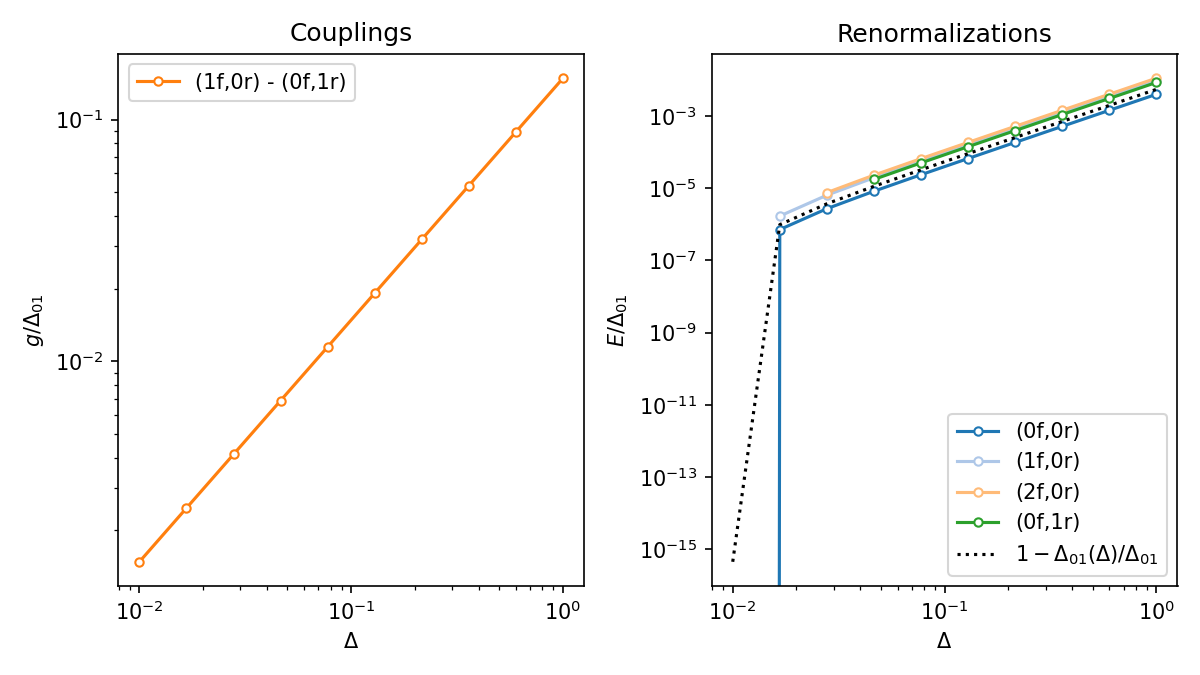

(1e-06, 0.01)

In [62]:
N_f, N_r = sq_ext.sq_get_energy_indices(sq_ext.sq_qubit(), sq_ext.sq_fluxonium(), sq_ext.sq_resonator())
fig1, ax1, ax2 = sq_ext.plot_H_eff_vs_param(H_eff_vs_params, H_eff_0, param_values, param_name, N_f, N_r, threshold=1e-3, scale='log')
ax2.set_ylim([1e-6,1e-2])
# plt.close('all')

In [63]:
H_eff_0 = sq_ext.H_eff_SWT(H_0_list[0], H_0_list[0], n_eig, real = False)
H_eff_vs_params = np.array([sq_ext.H_eff_SWT(H_0=H_0, H=H, n_eig=n_eig, real = False) for H_0, H in zip(H_0_list, H_list)])

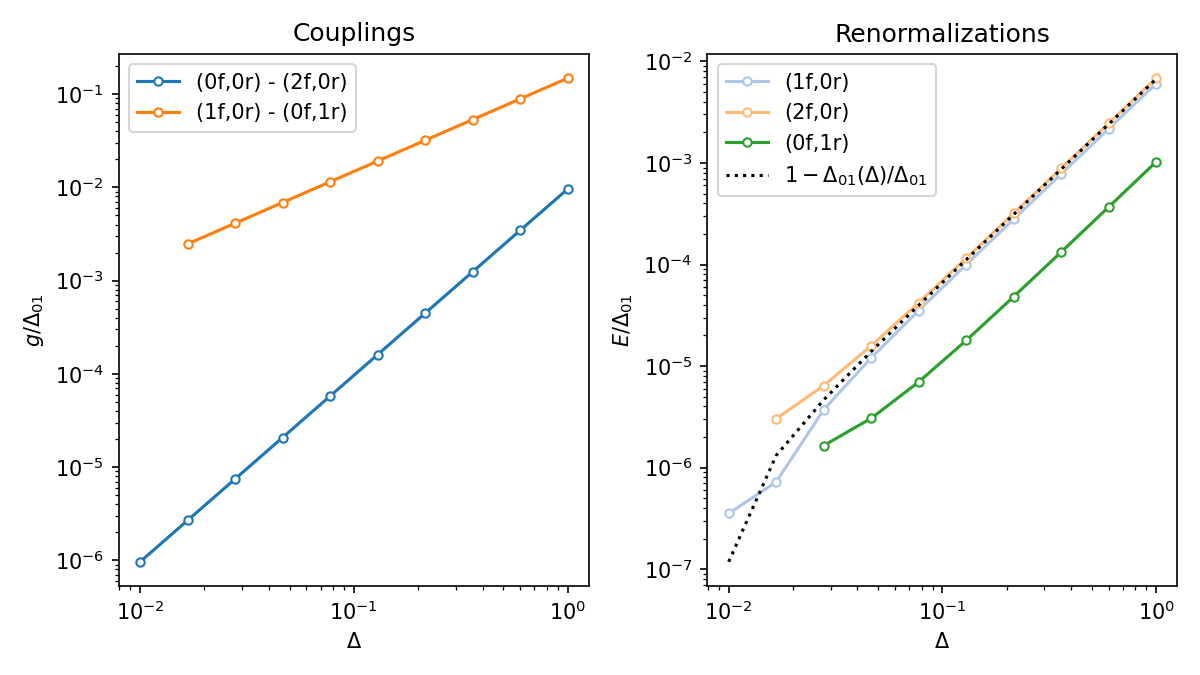

(1e-06, 0.01)

In [64]:
N_f, N_r = sq_ext.sq_get_energy_indices(sq_ext.sq_qubit(), sq_ext.sq_fluxonium(), sq_ext.sq_resonator())
fig1, ax1, ax2 = sq_ext.plot_H_eff_vs_param(H_eff_vs_params, H_eff_0, param_values, param_name, N_f, N_r, threshold=1e-3, scale='log')
ax2.set_ylim([1e-6,1e-2])
# plt.close('all')

In [24]:
Cf = C/2 + Csh + CJ
Cr = C/2 
Lf = l/(Lq+4*Lr) 

C_f = Cf * fF
C_r = Cr * fF
L_f = Lf * nH
E_J = EJ * GHz

In [25]:
E_L_f = (Φ_0/(2*np.pi))**2/L_f / h
E_L_f / GHz

6.539994179227587

In [26]:
E_C_f = e0**2 / (2*C_f) / h
E_C_f / GHz


0.7594573959979404

In [27]:
g_r_limit=np.zeros(len(Δ_values))
g_fq_limit=np.zeros(len(Δ_values))

for i, Δ in enumerate(Δ_values):
    l = Lq*(Lq+4*Lr) - 4*Δ**2
    
    Lf = l/(Lq+4*Lr)
    Lres = l/Lq
    L_f = Lf * nH
    L_r = Lres * nH
    E_L_f = (Φ_0/(2*np.pi))**2/L_f / h

    V =  lambda φ: E_L_f*φ**2/2 - EJ*GHz*np.cos(φ+np.pi)
    φ_min = sp.optimize.minimize_scalar(V).x

    Φ_f_fq_limit_01= (Φ_0 / (2 * np.pi)) * φ_min / np.sqrt(sq.hbar) 
    Φ_f_r_limit_01 = np.sqrt(0.5*np.sqrt(L_f/C_f))

    Φ_r_01 = np.sqrt(0.5*np.sqrt(L_r/C_r))

    g_fq_limit[i] = 2 * Δ / (l * nH) * Φ_f_fq_limit_01 * Φ_r_01  /2 / np.pi / GHz
    g_r_limit[i] = 2 * Δ / (l * nH) * Φ_f_r_limit_01 * Φ_r_01 /2 / np.pi / GHz


    

/home/gabriel/anaconda3/envs/tunable-cc/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


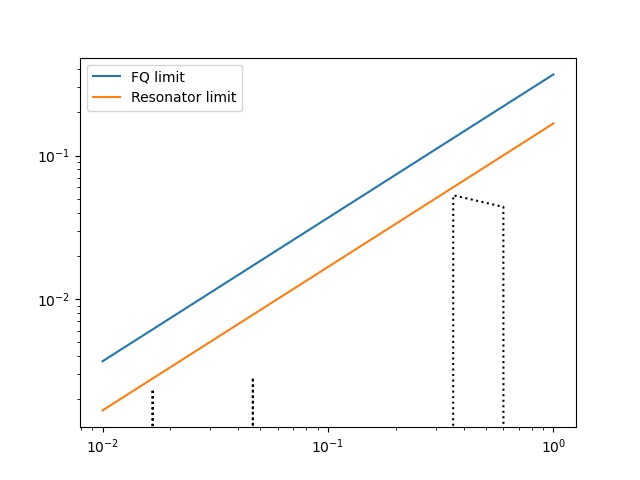

In [28]:
fig, ax = plt.subplots()

ax.plot(Δ_values, H_eff_vs_params[:,1,3]-H_eff_0[1,3], ':k')
ax.plot(Δ_values, g_fq_limit, label='FQ limit')
ax.plot(Δ_values, g_r_limit, label='Resonator limit')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()
fig.show()

In [65]:
EJ_values = np.geomspace(1,100,50)
g_r_limit = np.zeros(len(EJ_values))
g_fq_limit = np.zeros(len(EJ_values))
Δ=1
g_numeric = np.zeros([len(EJ_values),4,4])

for i, EJ in enumerate(EJ_values):
    l = Lq*(Lq+4*Lr) - 4*Δ**2
    
    Lf = l/(Lq+4*Lr)
    Lres = l/Lq
    L_f = Lf * nH
    L_r = Lres * nH
    E_L_f = (Φ_0/(2*np.pi))**2/L_f / h /GHz

    V =  lambda φ: E_L_f*φ**2/2 - EJ*np.cos(φ+np.pi)
    φ_min = sp.optimize.minimize_scalar(V).x

    Φ_f_fq_limit_01= (Φ_0 / (2 * np.pi)) * φ_min / np.sqrt(sq.hbar) 
    Φ_f_r_limit_01 = np.sqrt(0.5*np.sqrt(L_f/C_f))

    Φ_r_01 = np.sqrt(0.5*np.sqrt(L_r/C_r))

    g_fq_limit[i] = 2 * Δ / (l * nH) * Φ_f_fq_limit_01 * Φ_r_01  /2 / np.pi / GHz
    g_r_limit[i] = 2 * Δ / (l * nH) * Φ_f_r_limit_01 * Φ_r_01 /2 / np.pi / GHz
    
    H   = sq_ext.hamiltonian_qubit(EJ=EJ, Δ=Δ)
    H_0 = sq_ext.hamiltonian_qubit(EJ=EJ, Δ=0)
    
    H_eff_0 = sq_ext.H_eff_SWT(H_0, H_0, n_eig, real=False)
    H_eff = sq_ext.H_eff_SWT(H_0, H , n_eig, real=False)
    # g_numeric[i] = H_eff[1,3]
    g_numeric[i,:] = H_eff
    

C:\Users\gabri\AppData\Local\Temp\ipykernel_2200\951532009.py:33: ComplexWarning: Casting complex values to real discards the imaginary part
  g_numeric[i,:] = H_eff


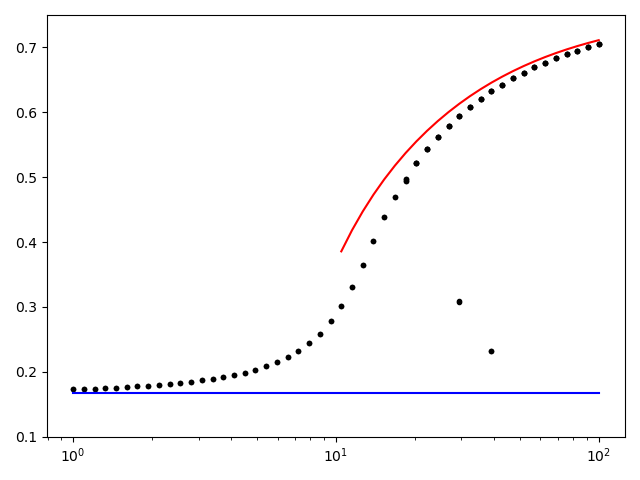

In [66]:
fig, ax = plt.subplots()
ax.plot(EJ_values, np.abs(np.reshape(g_numeric, [len(EJ_values), 16])),'.k')
ax.plot(EJ_values[25:], g_fq_limit[25:], 'r')
ax.plot(EJ_values, g_r_limit,'b')
#ax.set_ylabel(r'$')
#ax.set_xlabel(r'$')
#ax.set_title(r'$')
ax.set_xscale('log')
ax.set_ylim([0.1,0.75])
fig.tight_layout()
fig.show()
plt.close('all')